# Airbnb Seattle data analysis - price prediction model
## Introduction
The dataset consists of one file containing Airbnb listings from Seattle, WA in the United States. The data was downloaded from [Kaggle](https://www.kaggle.com/airbnb/seattle). The listings data consists of approx. 3.800 rows.

In this notebook I will attempt to build a model to predict the listing price based on the information available in the dataset.

## Gathering data

In [1]:
# Importing necessary packages and loading in the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import reg_model as rm

listings = pd.read_csv('listings.csv')

In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


## Cleaning data
The data is already quite clean, but some cleaning steps are necessary to make the data ready for modelling
- Drop unnecessary columns
- Change datatype of `host_response_rate`, `price` and `extra_people` variables from object to float
- Transform `amenities` column into separate columns for each amenity
- Handle small sample sizes in the `property_type` column
- Fix erroneous values from `guests_included` column
- Handle NaN values in numeric variables

#### Drop unnecessary columns
The dataset has a lot of columns, many of which are unnecessary or unsuitable for modelling, such as URL and web scrape info, various host information, as well as som superfluous info and columns with too many missing values. Below I will select which columns I will keep.

In [5]:
# Create list of columns that I want to keep in the dataset
columns = ['id', 'host_response_time', 'host_response_rate', 'host_is_superhost','neighbourhood_cleansed', 'property_type',
           'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
           'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy',
           'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count',
           'reviews_per_month']

In [6]:
#Create new dataframe with only the columns defined in the above list
col_drop = []
for col in listings.columns:
    if col not in columns:
        col_drop.append(col)
    else:
        continue
    
listings_clean = listings.drop(col_drop, axis=1)

In [7]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 33 columns):
id                                  3818 non-null int64
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_is_superhost                   3816 non-null object
neighbourhood_cleansed              3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
bed_type                            3818 non-null object
amenities                           3818 non-null object
price                               3818 non-null object
guests_included                     3818 non-null int64
extra_people                        38

##### Change datatype of `host_response_rate`, `price` and `extra_people` variables from object to float
The `host_response_rate` columns is a string with a % sign in front. I need to remove the % and change datatype.

The columns with dollar values are formatted as strings with a \$ in front of the number and a comma as the thousands separator. I need to remove the $ and the comma and then convert to float.

In [8]:
# Function to remove % and change datatype to float
def percent_to_float(df, col):
    df[col] = df[col].str.replace('%','').astype(float)/100
    
percent_to_float(listings_clean, 'host_response_rate')

In [9]:
# Function to remove $ and , and change to float
def price_to_float(df, col):
    df[col] = df[col].str.replace(',','').str.replace('$','').astype(float)

price_to_float(listings_clean, 'price')
price_to_float(listings_clean, 'extra_people')

#### Transform `amenities` column into separate columns for each amenity
The `amenities` column is formatted as a long string in each with every amenity in the listing. I need to split these up into separate columns for each amenity. To avoid creating columns with almost not non-null values, I will only create columns for amenities that show up at least 5 times.

In [10]:
# Create list of unique items in the 'amenities' column
amenities = listings_clean.amenities.str.replace('"','').str.replace('{','').str.replace('}','').str.split(',')
amenities = list(set(x for item in amenities for x in item))
# Remove one item which is a blank space
amenities.remove('')

In [11]:
amenities

['Other pet(s)',
 'Pool',
 'Suitable for Events',
 'Elevator in Building',
 'Cable TV',
 'Family/Kid Friendly',
 'Laptop Friendly Workspace',
 'Wheelchair Accessible',
 'Dryer',
 'Safety Card',
 'Essentials',
 'Air Conditioning',
 'Buzzer/Wireless Intercom',
 'Kitchen',
 'Breakfast',
 'Doorman',
 'Lock on Bedroom Door',
 'Dog(s)',
 'Free Parking on Premises',
 'Indoor Fireplace',
 'TV',
 'Gym',
 'Carbon Monoxide Detector',
 'Pets live on this property',
 'Smoke Detector',
 'Wireless Internet',
 '24-Hour Check-in',
 'Shampoo',
 'Internet',
 'Washer',
 'First Aid Kit',
 'Iron',
 'Smoking Allowed',
 'Fire Extinguisher',
 'Hangers',
 'Hot Tub',
 'Heating',
 'Pets Allowed',
 'Cat(s)',
 'Washer / Dryer',
 'Hair Dryer']

In [12]:
#Function to create a new column for each amenity and set a true or false value if the amenity is present in the listing.
#The function will only create columns for amenities which show up at least 5 times in the amenities column
def add_amenities(df, search_col, lst):
    for item in lst:
        if sum(df[search_col].str.contains(item)) >= 5:
            df[item] = df[search_col].str.contains(item)
    return df

In [13]:
# Run the function to add new amenities columns and drop the original column from the dataset
listings_clean = add_amenities(listings_clean, 'amenities', amenities)
listings_clean.drop('amenities', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


#### Handle small sample sizes in the `property_type` column
As seen in the plot below, some property types show up very few times in the data, and after running early versions of the model seem to create problems due to the small sample sizes. I have therefore limited the dataset to property types that appear at least 10 times in the data.

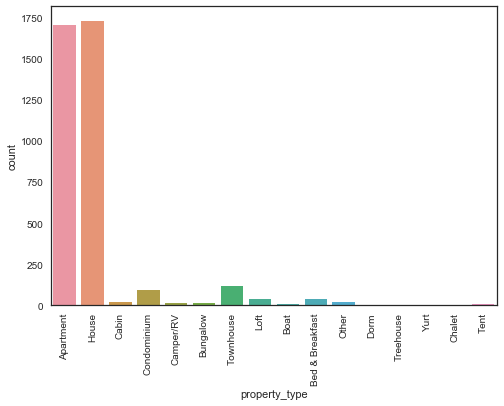

In [14]:
sns.countplot(data=listings_clean, x='property_type')
plt.xticks(rotation=90);

In [15]:
#Make a list of property types that appear at least 10 times
property_types = (listings_clean['property_type'].value_counts() >= 10).to_frame().query('property_type == True').index

#Keep only property types that appear at least 10 times
listings_clean = listings_clean[listings_clean['property_type'].isin(property_types)]
listings_clean = listings_clean.reset_index(drop=True)

##### Fix "missing" values from `guests_included` column
The `guests_included` column contain 92 zero values, but not Null values. As it's highly unlikely that there are listings which have no guests included, I feel confident that I can fill these rows with the value from the `accommodates` column. The difference between `guests_included` and `accommodates` is in most cases small, so even though this will create a some small errors in the `guests_included` columns, I feel confident it will not significantly reduce the quality of the data.

There are also 22 cases where `guests_included` is higher than `accommodates`, which doesn't make sense. I will replace the value in `guests_included` with the value from `accommodates`

The reason for including and cleaning the `guests_included` column is that I want to create a new feature that shows price per guest included.

In [16]:
print(len(listings_clean[listings_clean['guests_included']==0]))
print(len(listings_clean[listings_clean['guests_included'] > listings_clean['accommodates']]))

92
22


In [17]:
#If guests_included column is 0, replace with value from accommodates column
listings_clean['guests_included'] = np.where(listings_clean['guests_included'] == 0, listings_clean['accommodates'], listings_clean['guests_included'])
listings_clean['guests_included'] = np.where(listings_clean['guests_included'] > listings_clean['accommodates'], listings_clean['accommodates'], listings_clean['guests_included'])

#### Handle NaN values in numeric variables
Some of the numeric variables contain NaN values that need to be handled before the model can be fitted. I want to keep as many observations as possible in the dataset, so I prefer not to drop the rows with missing values. The missing values are mostly in the review score columns. Looking at the review score, there is not a lot of spread or variation in the numbers, so imputing the mean should not cause any major problems.

In [18]:
listings_clean[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3155.000000,3145.000000,3149.000000,3144.000000,3151.000000,3147.000000,3146.000000
mean,94.544849,9.636248,9.557002,9.788486,9.811488,9.610105,9.452956
std,6.603126,0.698933,0.796079,0.590610,0.559485,0.627966,0.750524
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
# Create list of numeric variables
num_vars = listings_clean.select_dtypes(include=['int', 'float'])

# Function to fill NaN values with mean
fill_mean = lambda col: col.fillna(col.mean())

#Apply the function on columns with numeric variables
listings_clean[num_vars.columns] = listings_clean[num_vars.columns].apply(fill_mean, axis=0)

In [20]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 69 columns):
id                                  3796 non-null int64
host_response_time                  3282 non-null object
host_response_rate                  3796 non-null float64
host_is_superhost                   3794 non-null object
neighbourhood_cleansed              3796 non-null object
property_type                       3796 non-null object
room_type                           3796 non-null object
accommodates                        3796 non-null int64
bathrooms                           3796 non-null float64
bedrooms                            3796 non-null float64
beds                                3796 non-null float64
bed_type                            3796 non-null object
price                               3796 non-null float64
guests_included                     3796 non-null int64
extra_people                        3796 non-null float64
minimum_nights                     

## Data modelling and visualization
After cleaning the data, we are ready to start building a model. I will try to build a linear regression model to predict the price of a listing. First I will fit a model using only the numeric variables in the dataset.

In [21]:
# Create list of numeric variables without the price variable
num_vars_drop_price = num_vars.drop('price', axis=1).columns

# Split into explanatory and response variables
X = listings_clean[num_vars_drop_price]
y = listings_clean['price']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [22]:
print(test_score)

0.520427282551


The first prediction gave us som rather mediocre results. With an r squared score of 0.52, about half of the variation in the price can be explained by the model.

I will try adding in the categorical variables. First I have to turn all categorical variables into dummy variables. The following function will be used for creating dummies. The function is based on the function used in the Udacity lesson on the data science process.

In [23]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue

    return df

In [24]:
#Create list of categorical columns
cat_cols = listings_clean.select_dtypes(include=['object', 'bool'])
cat_cols_list = cat_cols.columns

With a list of categorical columns ready, I can use the following function, which includes the dummy function, to fit a new model. The function is based on the function used in the Udacity lesson on the data science process.

In [25]:
def linear_model(df, response_col, id_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    id_col - a string holding the name of the id column to be removed before fitting
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split
    '''
    #Create dummies
    df = create_dummy_df(df, cat_cols, dummy_na)
    
    #Split data into X matrix and y
    X = df.drop([response_col, id_col], axis=1)
    y = df[response_col]
    
    #Create training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    #Instantiate and fit model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    
    #Predict responses
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    
    #Score model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds) 

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds

In [26]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = linear_model(listings_clean, 'price', 'id', cat_cols_list, dummy_na=False, rand_state=15)

In [27]:
train_score

0.6145887765521072

In [28]:
test_score

0.63009596240716559

In [29]:
median_absolute_error(y_test, y_test_preds)

23.846632353472245

The new model gave better results than the earlier model with only numeric variables. The r2 score still isn't great, but a definite improvement. About 63% of the variation can be explained by the model, and the median absolute error of the prediction is about 24 dollars. I want to take a look at the residuals to look at the errors in more detail.

In [30]:
#Create a dataframe with residuals
residuals_dict = {'y_test': y_test, 'y_test_preds': y_test_preds}
residuals_df = pd.DataFrame(data=residuals_dict)
residuals_df['residuals'] = residuals_df['y_test_preds'] - residuals_df['y_test']
residuals_df['abs_residuals'] = np.abs(residuals_df['residuals'])

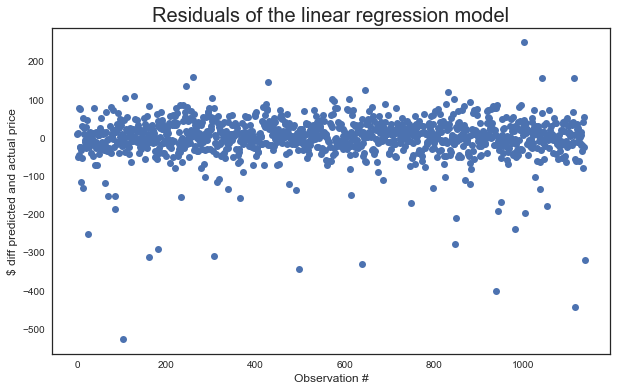

In [31]:
#Plot the resudials
plt.figure(figsize=[10,6])
plt.plot(residuals_df['residuals'].reset_index(drop=True), marker='o', linestyle='')
plt.title('Residuals of the linear regression model', fontsize=20)
plt.ylabel('$ diff predicted and actual price', fontsize=12)
plt.xlabel('Observation #', fontsize=12);

The plot of the residuals shows quite clearly that the model struggles most with predicting listings with higher prices, as it more frequently predicts prices that are too low. This is not unexpected, as most of the listings in the dataset are priced around the mean, and the model hasn't had that many examples of high priced listings to train with.

I want to look at the coefficients to see which of the columns have had the biggest influence on the predictions, using the function below. The function is based on the function used in the Udacity lesson on the data science process.

In [32]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [33]:
#Use the function
coef_df = coef_weights(lm_model, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
55,neighbourhood_cleansed_Industrial District,82.234125,82.234125
83,neighbourhood_cleansed_Pioneer Square,76.564464,76.564464
120,room_type_Shared room,-70.416830,70.416830
54,neighbourhood_cleansed_Holly Park,64.843651,64.843651
81,neighbourhood_cleansed_Pike-Market,64.492183,64.492183
96,neighbourhood_cleansed_Southeast Magnolia,60.262895,60.262895
95,neighbourhood_cleansed_South Park,-55.936061,55.936061
98,neighbourhood_cleansed_Sunset Hill,46.040269,46.040269
71,neighbourhood_cleansed_Montlake,45.558560,45.558560
84,neighbourhood_cleansed_Portage Bay,43.375431,43.375431


Looking at the coefficients and the variable names, it's clear that neighborhood has had the biggest influence on the predictions. We can also see a couple of room types that have had a clear negative influence.

I'd like to try a different model to see if I can improve the results a bit, and I want to combine this with making some prediction intervals. For this model I have borrowed heavily from [this website](https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed). It uses the Gradient Boosting Regressor method from Scikit learn and it uses quantiles to define the lower and upper bounds for the prediction interval.

In [34]:
# Set lower and upper quantile
lower_quantile = 0.1
upper_quantile = 0.9

#Instantiate models
lower_model = GradientBoostingRegressor(loss="quantile", alpha=lower_quantile)
# The mid model will use the default loss, which is 'least squares'
mid_model = GradientBoostingRegressor(loss="ls", n_estimators=900, min_samples_split=4, random_state=7)
upper_model = GradientBoostingRegressor(loss="quantile", alpha=upper_quantile)

In [35]:
# Fit models
lower_model.fit(X_train, y_train)
mid_model.fit(X_train, y_train)
upper_model.fit(X_train, y_train)
# Record actual values on test set
predictions = pd.DataFrame(y_test)
# Predict
predictions['lower'] = lower_model.predict(X_test)
predictions['mid'] = mid_model.predict(X_test)
predictions['upper'] = upper_model.predict(X_test)

In [36]:
print(r2_score(y_test, predictions['lower']))
print(r2_score(y_test, predictions['mid']))
print(r2_score(y_test, predictions['upper']))

0.0902401314402
0.696164640806
0.377364715148


In [37]:
median_absolute_error(y_test, predictions['mid'])

20.425574462128765

The results are further improved using this new model. The Rsquared score of about 0.70 is not great, but decent. About 70% of the variation can be explained by the model and the median absolute error shows that half the predicted values are within about 20 dollars from the actual price.

I want to plot the prediction intervals to see a visual representation of the predictions.

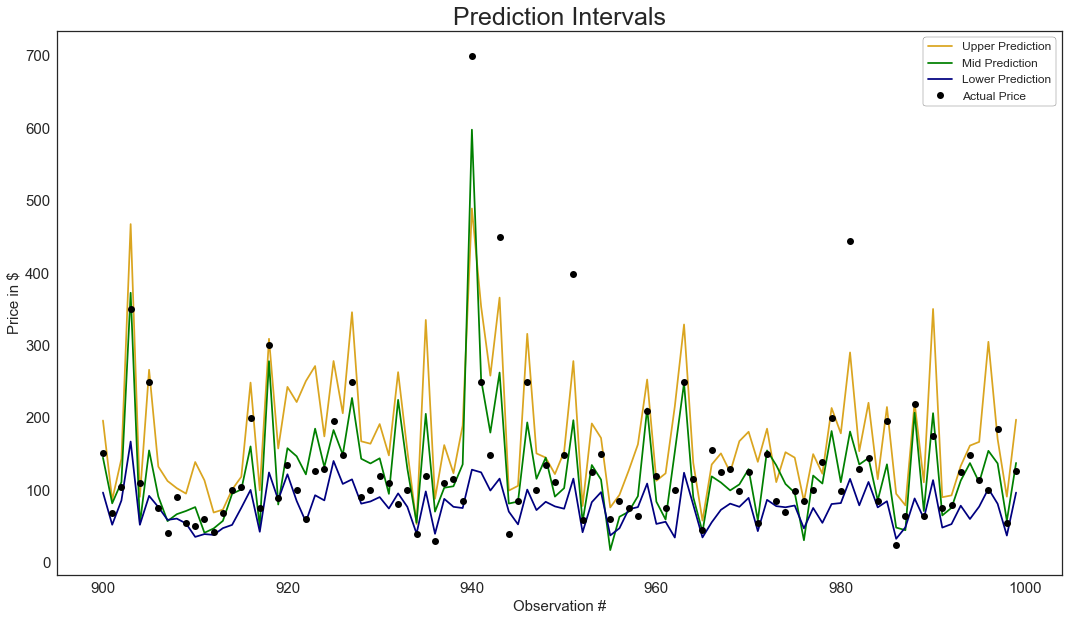

In [46]:
#Plot the prediction intervals. Use a subset of the predictions to make the plot readable
plt.figure(figsize=[18,10])
plt.plot(predictions['upper'].reset_index(drop=True)[900:1000], linestyle='-', color='goldenrod', label='Upper Prediction')
plt.plot(predictions['mid'].reset_index(drop=True)[900:1000], linestyle='-', color='green', label='Mid Prediction')
plt.plot(predictions['lower'].reset_index(drop=True)[900:1000], linestyle='-', color='navy', label='Lower Prediction')
plt.plot(predictions['price'].reset_index(drop=True)[900:1000], marker='o', linestyle='', color='black', label='Actual Price')
plt.legend(loc=1, frameon=True, edgecolor='black', fontsize=12)
plt.title('Prediction Intervals', fontdict = {'fontsize' : 25})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Price in $', fontsize=15)
plt.xlabel('Observation #', fontsize=15);

The plot shows a subset of the predictions (showing all predictions would make the plot unreadable). It shows that most predictions are within the bounds. It also tells us the same thing as the previous model, that it struggles most with predicting high prices.

I want to look more closely at some metrics to evaluate the results of the model. This also borrows heavily from the same [website](https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed) as the prediction intervals and its connected [notebook](https://nbviewer.jupyter.org/github/WillKoehrsen/Data-Analysis/blob/master/prediction-intervals/prediction_intervals.ipynb)

In [39]:
#Function to calculate absolute error for each model and the interval
def calculate_error(predictions):
    """
    Calculate the absolute error associated with prediction intervals
    
    :param predictions: dataframe of predictions
    :return: None, modifies the prediction dataframe
    
    """
    predictions['absolute_error_lower'] = (predictions['lower'] - predictions["price"]).abs()
    predictions['absolute_error_mid'] = (predictions['mid'] - predictions["price"]).abs()
    predictions['absolute_error_upper'] = (predictions['upper'] - predictions["price"]).abs()
        
    predictions['in_bounds'] = predictions["price"].between(left=predictions['lower'], right=predictions['upper'])

In [40]:
#Use the function to create a dataframe of the metrics
calculate_error(predictions)
metrics = predictions[['absolute_error_lower', 'absolute_error_mid', 'absolute_error_upper', 'in_bounds']].copy()
metrics.describe()

,absolute_error_lower,absolute_error_mid,absolute_error_upper
count,1139.000000,1139.000000,1139.000000
mean,50.365807,31.697253,55.422887
std,72.466286,39.951899,47.510551
min,0.043833,0.018249,0.099875
25%,11.442201,8.983214,22.528190
50%,26.720648,20.425574,45.062420
75%,59.817781,39.979768,73.213522
max,783.415350,423.066393,460.615672


In [41]:
metrics.in_bounds.mean()

0.76119402985074625

Using these metrics, we can see that about 76% of the predictions are in bound, i.e. between the lower and the upper bound. With the quantiles set at 0.1 and 0.9 however, the margin of error is quite large, so it's very important to be aware of this when assessing the model.

It's interesting to note that the lower bound model is much closer to the mid model in terms om median absolute error than the upper bound model. This also reinforces the interpretation that the model does a much better job at predicting the listings in the lower price range.